In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [47]:
print(df.dtypes)


Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [48]:
# Преобразуем столбец "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
print(df.dtypes)


Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [49]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()



Вывести несколько первых строк сгруппированных данных

In [50]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

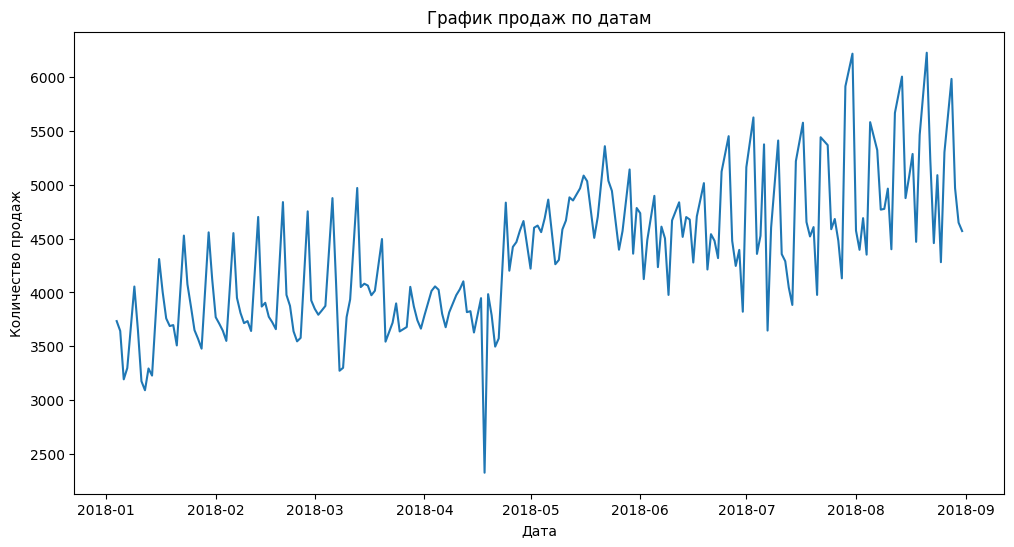

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка размера графика
plt.figure(figsize=(12, 6))

# Построение линейного графика продаж по дате
sns.lineplot(data=grouped_df, x='Дата', y='Количество')

plt.title('График продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')

plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике виден рост количества продаж с начала 2018 года до сентября 2018 года, сопровождаемый регулярными колебаниями. Количество продаж постепенно увеличивается, что может указывать на рост спроса.

Периодически наблюдаются резкие спады и подъемы, что может быть связано с сезонностью или внешними факторами. В начале года продажи варьируются в пределах 3000–4000, а к середине года достигают уже более 6000. Амплитуда колебаний также растет, что свидетельствует о большей волатильности спроса.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [52]:
# Вычисление первого и третьего квартилей и межквартильного размаха
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов
outliers = df[(df['Количество'] < (Q1 - 1.5 * IQR)) | (df['Количество'] > (Q3 + 1.5 * IQR))]

# Поиск строки с максимальным выбросом
max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

# Вывод строки с максимальным выбросом
print(max_outlier_row)


Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [53]:
# Фильтрация по условиям: июнь, июль, август, среда, склад 3
summer_data = df[(df['Дата'].dt.month.isin([6, 7, 8])) &
                 (df['Дата'].dt.weekday == 2) &  # 2 соответствует среде (понедельник=0, вторник=1, ... )
                 (df['Склад'] == 3)]

# Группировка по номенклатуре и подсчет суммарного количества
top_product = summer_data.groupby('Номенклатура')['Количество'].sum().idxmax()

# Вывод топового товара
print(f"Топовый товар по продажам по средам за июнь, июль, август на складе 3: {top_product}")

Топовый товар по продажам по средам за июнь, июль, август на складе 3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

Средняя температура: -4.88°C


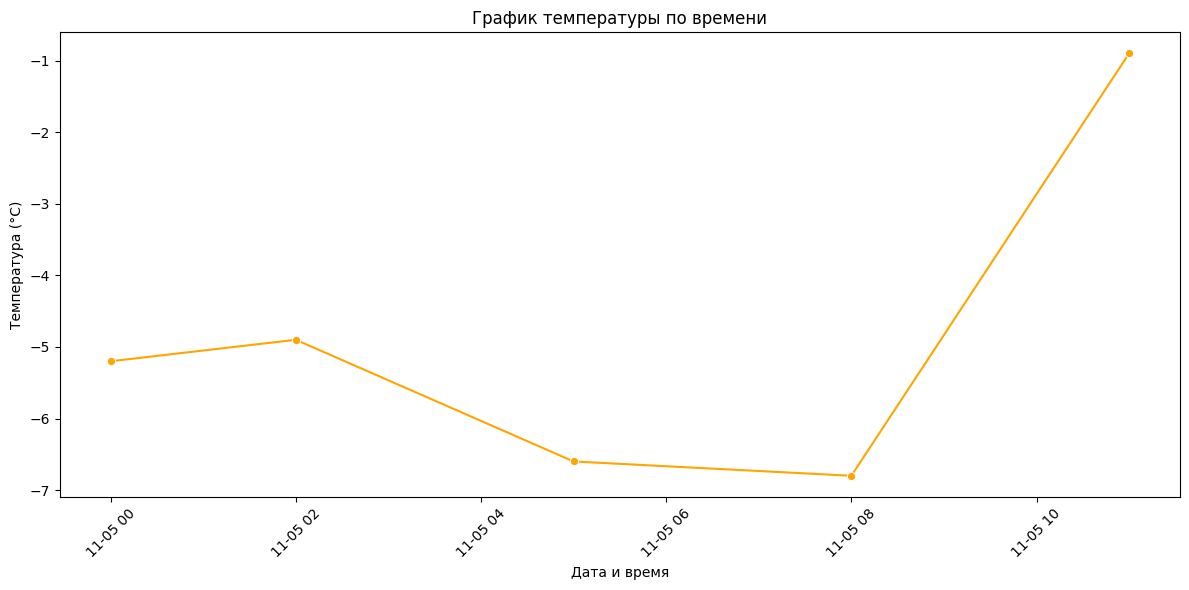

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных о продажах
sales_data = {
    'Дата': ['2018-01-04', '2018-01-04', '2018-01-04', '2018-01-04', '2018-01-04'],
    'Склад': [1, 1, 1, 1, 1],
    'Контрагент': ['address_0'] * 5,
    'Номенклатура': [f'product_{i}' for i in range(5)],
    'Количество': [4, 4, 5, 10, 2]
}

# Создание DataFrame для продаж
df = pd.DataFrame(sales_data)

# Преобразование столбца 'Дата' в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Загрузка данных о погоде
weather_data = {
    'Местное время в Астане': ['05.11.2024 11:00', '05.11.2024 08:00', '05.11.2024 05:00', '05.11.2024 02:00', '05.11.2024 00:00'],
    'T': [-0.9, -6.8, -6.6, -4.9, -5.2]
}

# Создание DataFrame для погоды
weather_df = pd.DataFrame(weather_data)

# Преобразование столбца 'Местное время в Астане' в формат datetime
weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане'], format='%d.%m.%Y %H:%M')

# Преобразование 'T' в числовой формат
weather_df['T'] = weather_df['T'].astype(float)

# Убираем лишние данные, оставляя только дату и температуру
temperature_df = weather_df[['Дата', 'T']].copy()
temperature_df.rename(columns={'T': 'Температура'}, inplace=True)

# Вычисление средней температуры
average_temperature = temperature_df['Температура'].mean()

# Вывод средней температуры
print(f'Средняя температура: {average_temperature:.2f}°C')

# Визуализация данных
plt.figure(figsize=(12, 6))

# Построение линейного графика температуры
sns.lineplot(data=temperature_df, x='Дата', y='Температура', marker='o', color='orange')

plt.title('График температуры по времени')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Повернуть метки по оси x для лучшей читаемости
plt.tight_layout()  # Улучшить оформление графика
plt.show()
